In [1]:
import numpy as np
import cv2
import imutils
import os
import scipy
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from object_detector import *

In [2]:
## Function to plot multiple images

def plot_img(images, titles):
    fig, axs = plt.subplots(nrows = 1, ncols = len(images), figsize = (20, 20))
    for i, p in enumerate(images):
        axs[i].imshow(p, 'gray')
        axs[i].set_title(titles[i])
        #axs[i].axis('off')
        plt.show()

In [90]:
# LOAD OBJECT DETECTOR
detector = HomogeneousBgDetector()

# LOAD IMAGE
image = cv2.imread(r"C:\Users\muham\Desktop\lelah_TA\fix_data\test_data\Ukuran Telur\Telur Size 5\new.jpg")

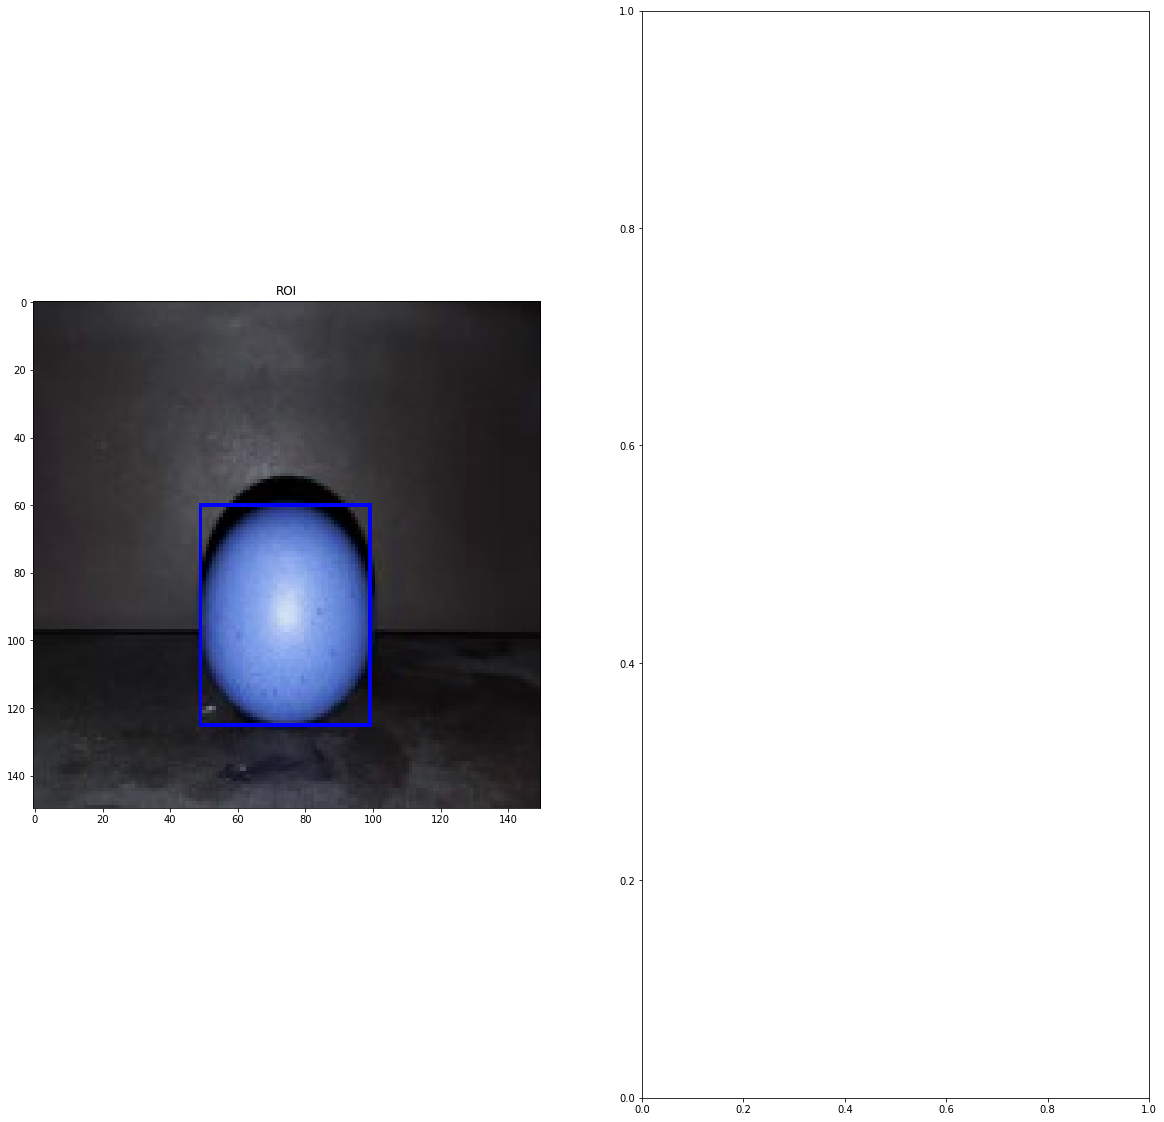

(65, 50, 3)

In [98]:
# Draw ROI (Region of Interest)
imgNew = image.copy()
roi = cv2.rectangle(imgNew, (49, 60), (99, 125), (0,0,255), 1)

# Cropping
cropped = imgNew[60:125, 49:99]
crop = image[60:125, 49:99]

# Plot the images
images = [roi, crop]
titles = ['ROI', 'Cropped']
plot_img(images, titles)

cropped.shape

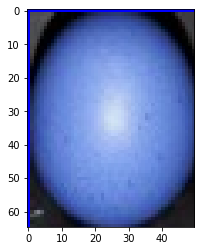

In [99]:
plt.imshow(cropped)

In [100]:
cv2.imwrite('C:/Users/muham/Desktop/lelah_TA/fix_data/test_data/Ukuran Telur/Telur Size 5/crop.jpg', crop)


True

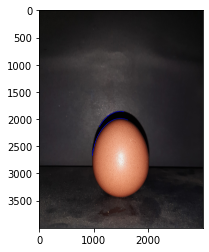

In [11]:
plt.imshow(img)

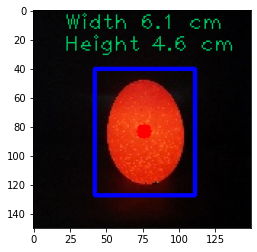

In [33]:
import cv2
from object_detector import *
import numpy as np

# Load Object Detector
detector = HomogeneousBgDetector()

# Load Image
img = cv2.imread(r"C:\Users\muham\Desktop\lelah_TA\fix_data\DataTest\candle\dataset1\after_preprocessing\image06.jpg")

# Pixel to cm ratio
pixel_cm_ratio = 12.3

contours = detector.detect_objects(img)

# Draw objects boundaries
for cnt in contours:
    # Get rect
    rect = cv2.minAreaRect(cnt)
    (x, y), (w, h), angle = rect

    # Get Width and Height of the Objects by applying the Ratio pixel to cm
    object_width = w / pixel_cm_ratio - 1
    object_height = h / pixel_cm_ratio - 1

    # Display rectangle
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    cv2.circle(img, (int(x), int(y)), 5, (0, 0, 255), -1)
    cv2.polylines(img, [box], True, (255, 0, 0), 2)
    cv2.putText(img, "Width {} cm".format(round(object_width, 1)), (int(x - 55), int(y - 70)), cv2.FONT_HERSHEY_PLAIN, 1, (100, 200, 0), 1)
    cv2.putText(img, "Height {} cm".format(round(object_height, 1)), (int(x - 55), int(y - 55)), cv2.FONT_HERSHEY_PLAIN, 1, (100, 200, 0), 1)


new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(new_img)
# cv2.imshow("Image", img)
# cv2.waitKey(0)